In [9]:
import numpy as np
from qiskit.providers.basicaer import QasmSimulatorPy
#from bandcalq import BandCalQ
import bandcalq
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import SPSA

from importlib import reload
reload(bandcalq)

<module 'bandcalq' from 'd:\\Qiskit\\Thesis\\BandCalQ\\BandCalQ\\bandcalq.py'>

In [12]:
#All possible parameters
orbitals = 3
t = np.array([[ 0.06   ,  -0.08    ,   0.03 ],
              [ -0.08    ,   0.09    ,   -0.1 ],
              [ 0.03     ,   -0.1    ,   -0.05]])
lattice_parameter = 4
backend = QasmSimulatorPy()
ansatz = EfficientSU2(orbitals, su2_gates=['rx', 'rz', 'ry'], entanglement='full', reps=3)
optimizer = SPSA(maxiter=500)
sites = 1

#Defining problem using BandCalQ class, non-default ansatz and optimizer provided
problem = bandcalq.BandCalQ(orbital_number=orbitals, lattice_constant=lattice_parameter, hopping_matrix=t, backend=backend, interacting_sites=sites, ansatz=ansatz, optimizer=optimizer)

#Computing bands, in this example inside first Brillouin zone
#Theoretical points can be calculated in compute_band_structure method or later in plot_band_structure
problem.compute_band_structure(momentum_min=-np.pi/lattice_parameter, momentum_max=np.pi/lattice_parameter, momentum_points_amount=2, theoretical_points=False)


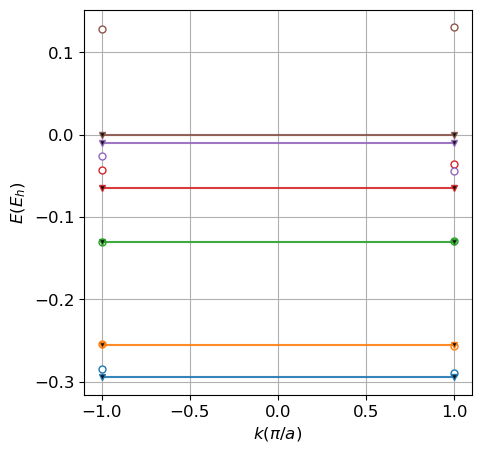

In [13]:
import matplotlib.pyplot as plt
problem.plot_band_structure(theoretical_points=True)